# Comparison of algorithms

In [1]:
import numpy as np
from datetime import datetime
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df_vt = pd.read_csv('pacing(vt)_10-07-2020_08-08-2020.csv', index_col="Date", parse_dates=True)
df_at = pd.read_csv('pacing(at)_10-07-2020_08-08-2020.csv', index_col="Date", parse_dates=True)
df_ev = pd.read_csv('pacing(at_and_evolutive)_10-07-2020_08-08-2020.csv', index_col="Date", parse_dates=True)

### Remaining budgets

In [3]:
rb_vt = df_vt.remaining_budget.groupby(df_vt.index.day).tail(1)
rb_at = df_at.remaining_budget.groupby(df_at.index.day).tail(1)
rb_ev = df_ev.remaining_budget.groupby(df_ev.index.day).tail(1)

In [4]:
frame = { 'rb_vt': rb_vt, 'rb_at': rb_at, 'rb_ev': rb_ev } 
result = pd.DataFrame(frame) 

In [5]:
result

,rb_vt,rb_at,rb_ev
Date,,,
2020-07-10 19:50:35,773,773,145
2020-07-11 19:42:32,488,488,0
2020-07-12 19:59:59,1,1,0
2020-07-13 19:54:56,0,0,0
2020-07-14 19:54:27,0,0,0
2020-07-15 19:59:58,0,0,0
2020-07-16 19:59:59,5,5,0
2020-07-17 19:56:11,951,951,0
2020-07-18 19:57:21,855,855,0


In [6]:
print(f"Acceleration and speed have the same average remaining budget: \n \t {round(result.rb_vt.mean(),2)} euros. \n Evolutive target has a much better efficiency in the remaining budget :\n \t {round(result.rb_ev.mean(),2)} euros.")

Acceleration and speed have the same average remaining budget: 
 	 197.33 euros. 
 Evolutive target has a much better efficiency in the remaining budget :
 	 4.93 euros.


Firstly, acceleration and speed algorithms return both the same results.
Evolutive target is far better but this is quite logical because this algorithm has learned the evolution of the times series. But this is at least an evidence that the fact to learn the distribution of the br in a given day gives far better results.

### Spending comparisons

In [6]:
day_vt = df_vt['2020-07-11 06:00:00':'2020-07-11 20:00:00']
day_at = df_at['2020-07-11 06:00:00':'2020-07-11 20:00:00']
day_ev = df_ev['2020-07-11 06:00:00':'2020-07-11 20:00:00']

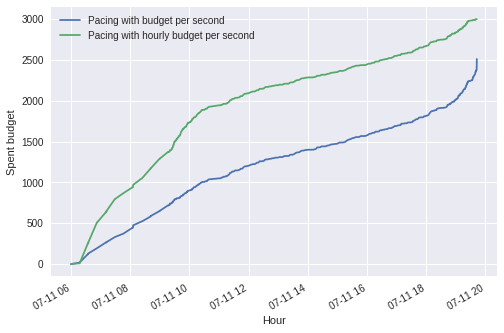

In [10]:
day_vt.spent_budget.plot(label = 'Pacing with budget per second')
day_ev.spent_budget.plot(label = 'Pacing with hourly budget per second')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Spent budget')
plt.savefig("good_et3.pdf")

This particular day highlights the fact that the evolutive target has learned that there will be a high slowdown during the middle of the day and it has anticipate this by buying a much largen inventory before the slowdown